https://www.tensorflow.org/guide/keras/train_and_evaluate?hl=es

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
y_pred = [0.1, 0, 0, 0.2, 0.7, 0, 0, 0, 0, 0]  # One-Hot encoder
y_real = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [3]:
y_pred = 2
y_real = 4

### Softmax

Función de activación cuya salida es un array con valores entre el rango [[0, 1]] y cuya suma total debe ser 1.


In [4]:
# Construimos el modelo

# Las entradas van a tener 784 dimensiones en forma de vector (28x28)
inputs = keras.Input(shape=(784,), name="digits")
# Primera capa de la red, con 64 neuronas y usando ReLu
x1 = layers.Dense(64, activation="relu")(inputs)
# Segunda capa de la red, con 64 neuronas y usando ReLu
x2 = layers.Dense(32, activation="relu")(x1)
# La salida de la red con 10 neuronas porque estamos usando un algoritmo de clasificación de 10
# Softmax 
outputs = layers.Dense(10, activation="softmax", name="predictions")(x2)

model = keras.Model(inputs=inputs, outputs=outputs)

In [5]:
# Ejemplo de otra creación de capas (NO EJECUTAR)
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(32, activation='relu'),
    #layers.Dense(32, activation='sigmoid'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation="softmax")
  ])

In [6]:
# Cogemos las imágenes de los dígitos y cogemos el conjunto de train, val y test
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [31]:
# Normalizamos la imagen dividiéndola por 255 y transformándola a imagen 28x28
to_show = (x_train[0]/255).reshape(28,28)
to_show

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

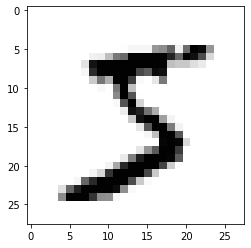

In [32]:
import matplotlib.pyplot as plt

plt.imshow(to_show, cmap=plt.cm.get_cmap('Greys'))

In [29]:
y_train[0]

5

In [36]:
# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [37]:
# Se especifica la configuración del entrenamiento (optimizador, pérdida, métricas):
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [38]:
# Summary
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 784)]             0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
predictions (Dense)          (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Entrenamos el modelo con un batch_size de 64 imágenes por cada iteración, 10 epochs y especificando cuál es el conjunto de validación.
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=15,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

Fit model on training data
Epoch 1/15
782/782 [==============================] - 1s 803us/step - loss: 0.3602 - sparse_categorical_accuracy: 0.9004 - val_loss: 0.1942 - val_sparse_categorical_accuracy: 0.9470
Epoch 2/15
782/782 [==============================] - 1s 788us/step - loss: 0.1699 - sparse_categorical_accuracy: 0.9491 - val_loss: 0.1528 - val_sparse_categorical_accuracy: 0.9571
Epoch 3/15
782/782 [==============================] - 1s 710us/step - loss: 0.1258 - sparse_categorical_accuracy: 0.9626 - val_loss: 0.1188 - val_sparse_categorical_accuracy: 0.9656
Epoch 4/15
782/782 [==============================] - 1s 682us/step - loss: 0.1023 - sparse_categorical_accuracy: 0.9694 - val_loss: 0.1090 - val_sparse_categorical_accuracy: 0.9697
Epoch 5/15
782/782 [==============================] - 1s 695us/step - loss: 0.0862 - sparse_categorical_accuracy: 0.9742 - val_loss: 0.1157 - val_sparse_categorical_accuracy: 0.9681
Epoch 6/15
782/782 [==============================] - 1s 694us/

In [40]:
# Podemos ver el histórico que ha ocurrido cogiendo el mejor de cada epoch
history.history

{'loss': [0.36024901270866394,
  0.1698835790157318,
  0.12583360075950623,
  0.10226989537477493,
  0.08622755855321884,
  0.0758214220404625,
  0.06675097346305847,
  0.05869341641664505,
  0.05324171483516693,
  0.04697727411985397,
  0.04253014549612999,
  0.03799610957503319,
  0.03378729894757271,
  0.030573299154639244,
  0.027699965983629227],
 'sparse_categorical_accuracy': [0.90038001537323,
  0.9490799903869629,
  0.9625800251960754,
  0.9694200158119202,
  0.9742199778556824,
  0.9774799942970276,
  0.9799200296401978,
  0.98225998878479,
  0.9838799834251404,
  0.9862200021743774,
  0.9868000149726868,
  0.9886199831962585,
  0.9895600080490112,
  0.9905400276184082,
  0.9916200041770935],
 'val_loss': [0.1942407339811325,
  0.15284565091133118,
  0.11882512271404266,
  0.10904901474714279,
  0.11566643416881561,
  0.10025293380022049,
  0.10474006086587906,
  0.10350608825683594,
  0.09990260750055313,
  0.10406941175460815,
  0.10186037421226501,
  0.11224456876516342,
 

In [41]:
# Obtenemos el "score" a partir del conjunto de test
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
79/79 [==============================] - 0s 555us/step - loss: 0.1059 - sparse_categorical_accuracy: 0.9748
test loss, test acc: [0.1058652326464653, 0.9747999906539917]


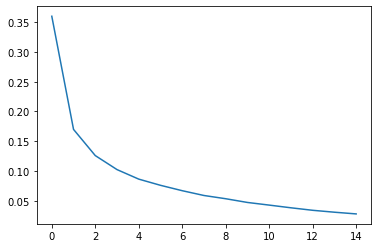

In [42]:
plt.plot(history.history["loss"])

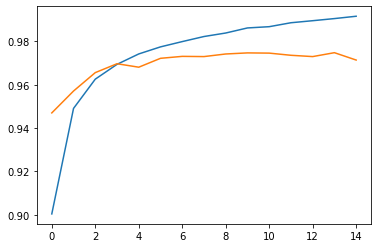

In [44]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])

In [45]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:1])
print("predictions shape:", predictions.shape)
predictions

Generate predictions for 3 samples
predictions shape: (1, 10)


array([[5.6945330e-11, 1.0044482e-09, 4.4714707e-08, 1.0604017e-04,
        6.1387875e-19, 7.9033963e-10, 2.2307743e-17, 9.9989390e-01,
        1.4040342e-09, 4.8288129e-08]], dtype=float32)

In [58]:
predictions.max()

0.9999999

In [59]:
predictions.argmax()

7

In [46]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)
for i,image_predicted in enumerate(predictions):
    print("Image",i,":", image_predicted.argmax())
    #plt.imshow(x_test[2:3].reshape(28,28), cmap=plt.cm.get_cmap('Greys'))

Generate predictions for 3 samples
predictions shape: (3, 10)
Image 0 : 7
Image 1 : 2
Image 2 : 1


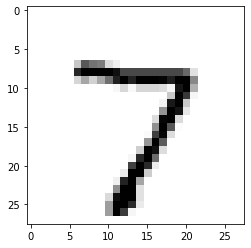

In [47]:
to_show = (x_test[0]/255).reshape(28,28)
plt.imshow(to_show, cmap=plt.cm.get_cmap('Greys'))

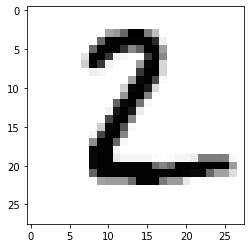

In [39]:
to_show = (x_test[1]/255).reshape(28,28)
plt.imshow(to_show, cmap=plt.cm.get_cmap('Greys'))

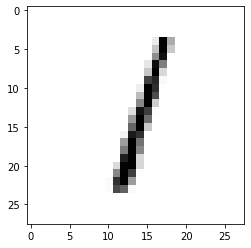

In [40]:
to_show = (x_test[2]/255).reshape(28,28)
plt.imshow(to_show, cmap=plt.cm.get_cmap('Greys'))

In [ ]:
model.save("my_keras_model.h5")
# Lo volvemos a cargar
model = keras.models.load_model("my_keras_model.h5")